In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show(img, title):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

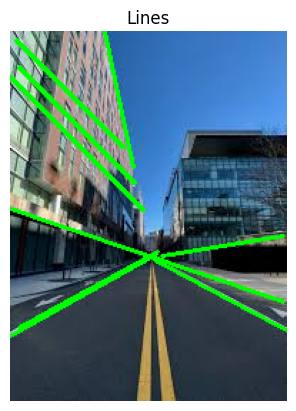

In [3]:
img1 = cv2.imread('images.jpeg')
if img1 is not None:
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)
    
    if lines is not None:
        for points in lines:
            x1, y1, x2, y2 = points[0]
            cv2.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2)
    show(img1, 'Lines')

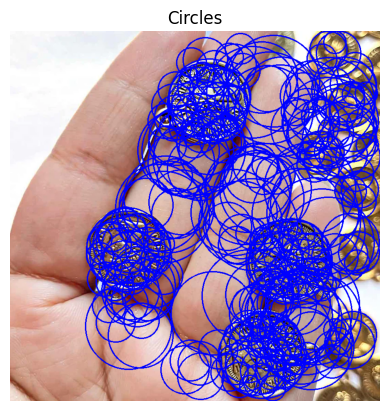

In [4]:
img2 = cv2.imread('circle.webp')
if img2 is not None:
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=60, minRadius=10, maxRadius=100)
    if circles is not None:
        for c in np.uint16(np.around(circles))[0, :]:
            cv2.circle(img2, (c[0], c[1]), c[2], (255, 0, 0), 2)
    show(img2, 'Circles')

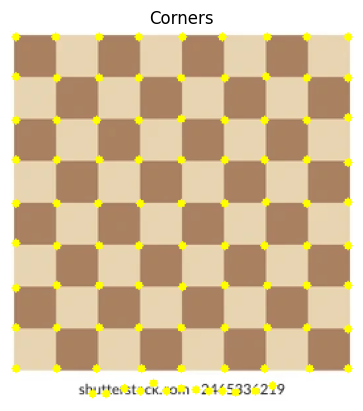

In [5]:
img3 = cv2.imread('corner.webp')
if img3 is not None:
    gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
    if corners is not None:
        corners = np.int32(corners)
        for p in corners:
            x, y = p.ravel()
            cv2.circle(img3, (x, y), 3, (0, 255, 255), -1)
    show(img3, 'Corners')


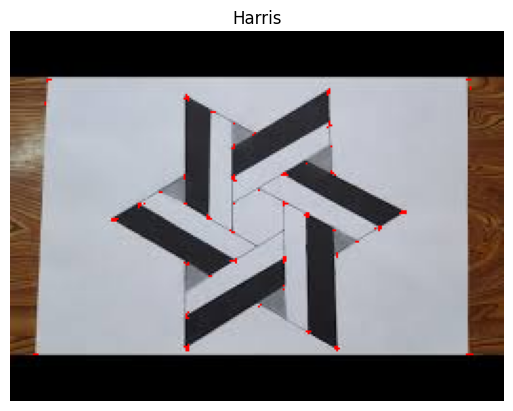

In [6]:
img4 = cv2.imread('harris.jpeg')
if img4 is not None:
    gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
    harris = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
    img4[harris > 0.01 * harris.max()] = [0, 0, 255]
    show(img4, 'Harris')

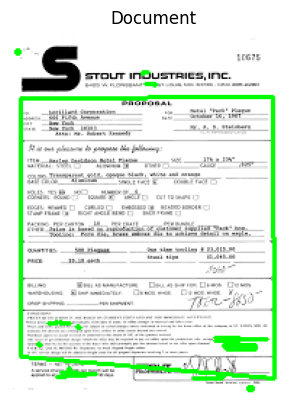

In [7]:
img5 = cv2.imread('document.png')
if img5 is not None:
    gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
            cv2.drawContours(img5, [approx], -1, (0, 255, 0), 2)
    show(img5, 'Document')

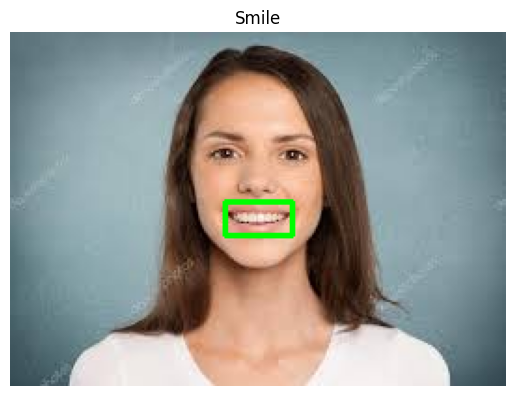

In [8]:
img6 = cv2.imread('smile.jpeg')
if img6 is not None:
    gray = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smiles = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    detected = faces.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in detected:
        face_roi = gray[y:y+h, x:x+w]
        smiles_detected = smiles.detectMultiScale(face_roi, 1.8, 20)
        for (sx, sy, sw, sh) in smiles_detected:
            cv2.rectangle(img6, (x+sx, y+sy), (x+sx+sw, y+sy+sh), (0, 255, 0), 2)
    show(img6, 'Smile')